Clustering Wholesale customers

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import RobustScaler, PowerTransformer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

Reading Dataset into Python

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.shape

(440, 8)

In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
df['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [6]:
df['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Purchase by Region:
1. Average Purchase

In [8]:
df.drop('Channel',axis=1).groupby('Region').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Region,,,,,,
1,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104
2,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128
3,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266


2. Maximum purchase

In [9]:
df.drop('Channel',axis=1).groupby('Region').max()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Region,,,,,,
1,56083,28326,39694,18711,19410,6854
2,32717,25071,67298,60869,38102,5609
3,112151,73498,92780,36534,40827,47943


3. Minimum Purchase

In [10]:
df.drop('Channel',axis=1).groupby('Region').min()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Region,,,,,,
1,18,258,489,61,5,7
2,3,333,1330,131,15,51
3,3,55,3,25,3,3


Outlier Detection

In [11]:
products = df.drop(['Channel', 'Region'], axis=1).columns.to_list()

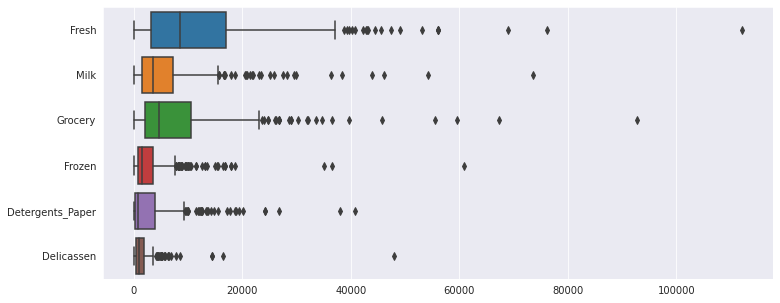

In [12]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[products], orient='h')
plt.show()

In [13]:
X = df[products]
X_robust = X.copy(deep=True)
X_power = X.copy(deep=True)

Since the dataset is small with significant presence of outliers, we can adopt a two way approach:

Robust scaling and clustering to remove effect of outliers in scaling.
Power transformation to reduce overall skewness and variance in data.
1. Robust Scaling

In [14]:
robust = RobustScaler()
X_robust[products] = robust.fit_transform(X[products])
X_robust.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.301680,1.065712,0.329952,-0.466572,0.506787,0.263810
1,-0.104810,1.092934,0.565993,0.083926,0.675670,0.574008
2,-0.155802,0.915816,0.344418,0.312589,0.736512,4.871459
3,0.344850,-0.429714,-0.062862,1.734708,-0.084442,0.582507
4,1.022092,0.315171,0.287260,0.849573,0.262056,2.988314


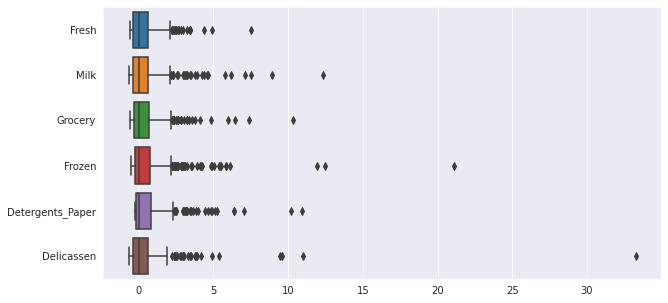

In [15]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.boxplot(data=X_robust[products], orient='h')
plt.show()

2. Power Transform

In [16]:
pt = PowerTransformer()
X_power[products] = pt.fit_transform(X[products])
X_power.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.413012,0.979454,0.394901,-1.457973,0.620530,0.338074
1,-0.110911,0.995243,0.628376,0.080081,0.751556,0.602222
2,-0.195814,0.888063,0.410688,0.332499,0.793104,2.240051
3,0.458126,-0.965336,-0.154740,1.173953,-0.372736,0.608674
4,1.028870,0.412660,0.346961,0.742061,0.367767,1.737333


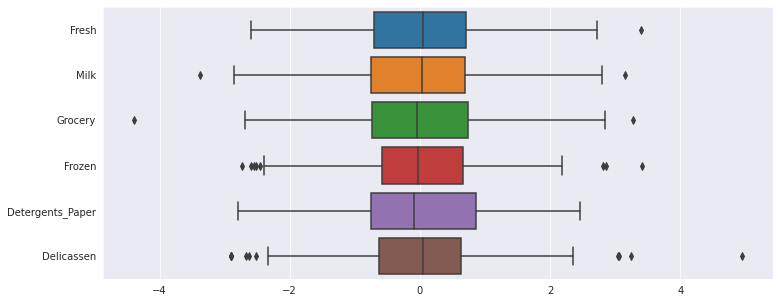

In [17]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 5))
sns.boxplot(data=X_power[products], orient='h')
plt.show()

K-Means Clustering:
1. With Robust Scaling

In [18]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_robust)
    wcss.append(kmeans.inertia_)

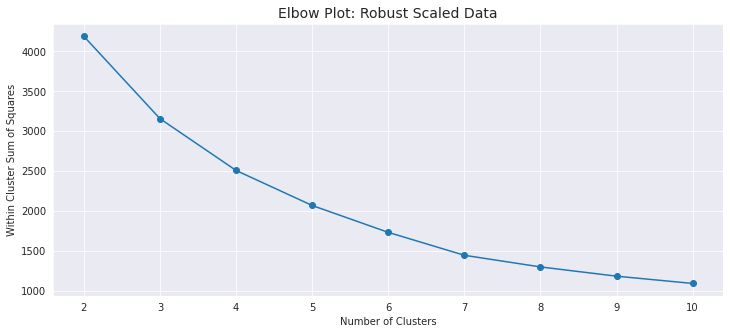

In [19]:
from matplotlib import markers
plt.figure(figsize=(12, 5))
plt.title('Elbow Plot: Robust Scaled Data', fontsize=14)
plt.plot(range(2, 11), wcss, marker='o')
plt.ylabel('Within Cluster Sum of Squares')
plt.xlabel('Number of Clusters')
plt.show()

2. With Power tranformation

In [20]:
wcss_2 = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_power)
    wcss_2.append(kmeans.inertia_)

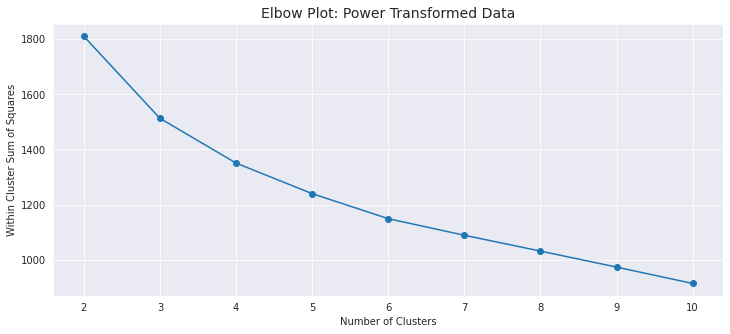

In [21]:
from matplotlib import markers
plt.figure(figsize=(12, 5))
plt.title('Elbow Plot: Power Transformed Data', fontsize=14)
plt.plot(range(2, 11), wcss_2, marker='o')
plt.ylabel('Within Cluster Sum of Squares')
plt.xlabel('Number of Clusters')
plt.show()

In both cases 6 seems to be ideal number of clusters although variance within clusters seem significantly less in power transformed data.

Silhouette Score validation:
1. For robust scaled data

For n_clusters = 2 The average silhouette_score is : 0.9032151582400334
For n_clusters = 3 The average silhouette_score is : 0.5679608533025163
For n_clusters = 4 The average silhouette_score is : 0.5296362348131485
For n_clusters = 5 The average silhouette_score is : 0.3620214544563641
For n_clusters = 6 The average silhouette_score is : 0.3590441744492351
For n_clusters = 7 The average silhouette_score is : 0.3629251005656419


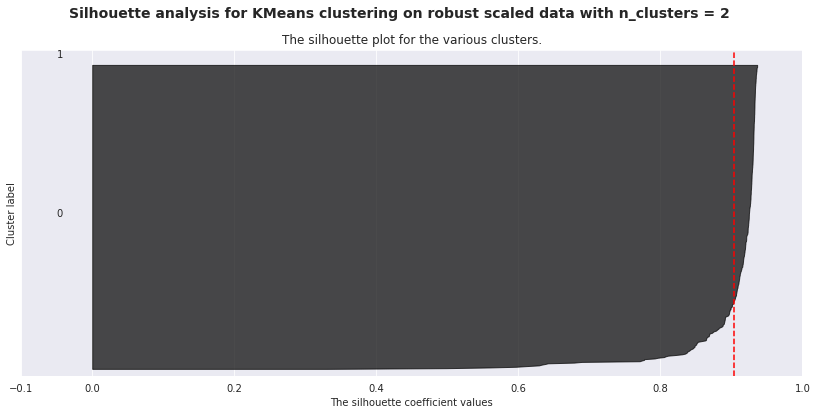

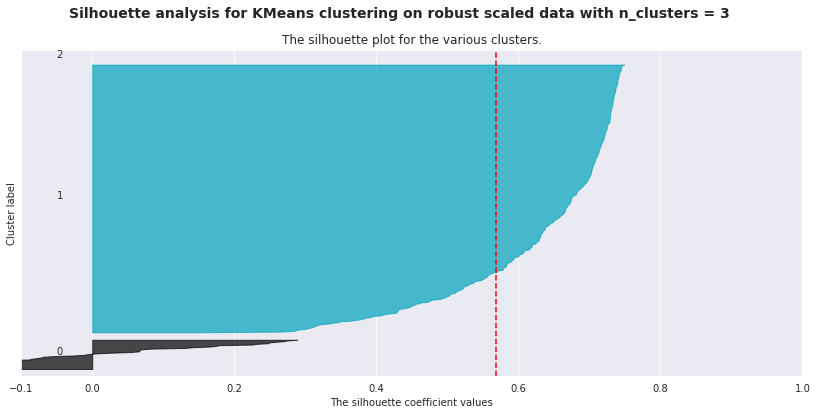

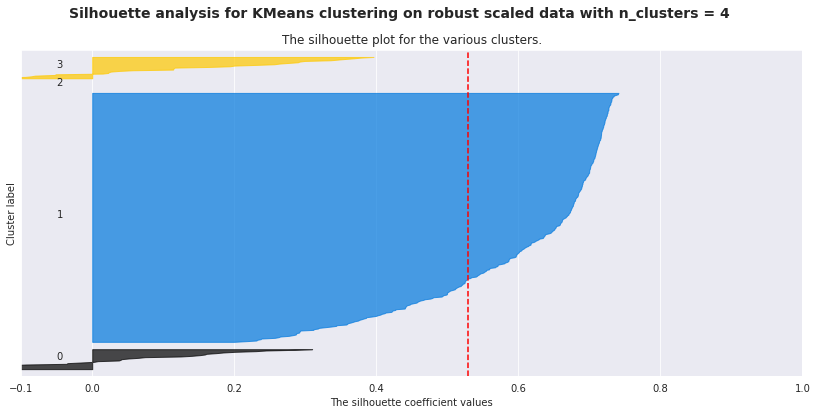

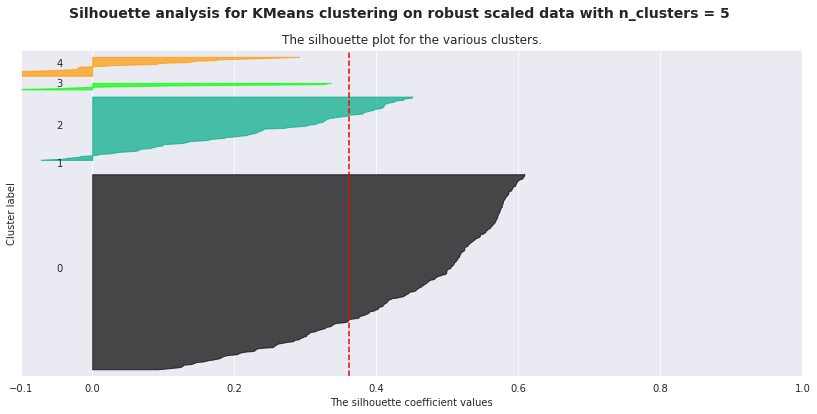

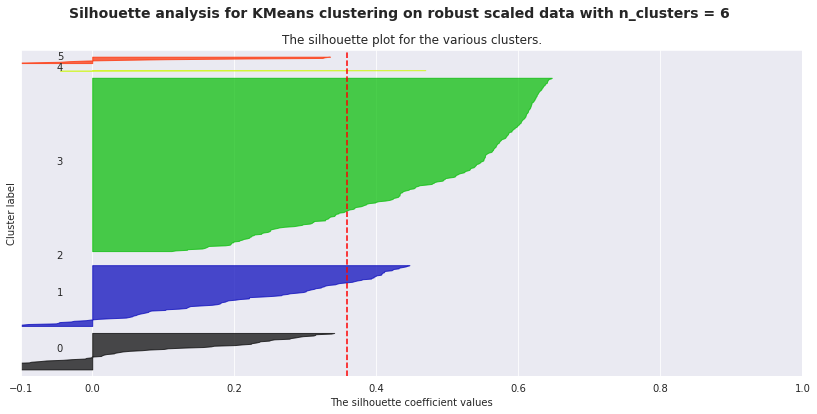

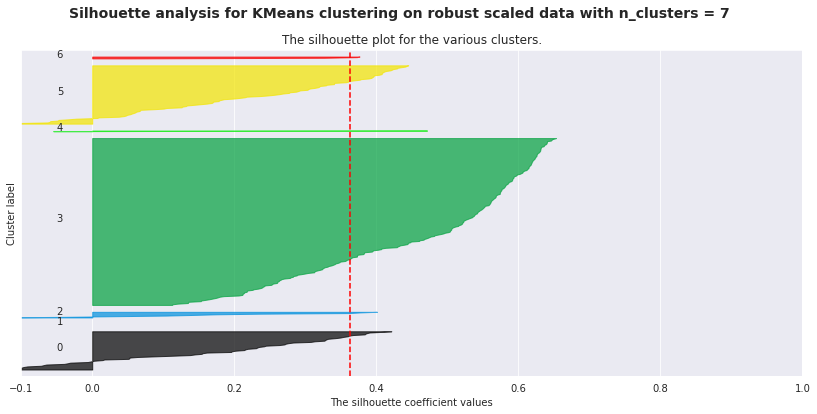

In [22]:
range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    fig, ax1  = plt.subplots(1, 1)
    fig.set_size_inches(14, 6)

    # The silhouette coefficient can range from -1, 1 but here all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_robust) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_robust)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_robust, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_robust, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    
    plt.suptitle(
        "Silhouette analysis for KMeans clustering on robust scaled data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

2. For power transformed data

For n_clusters = 2 The average silhouette_score is : 0.294989794082826
For n_clusters = 3 The average silhouette_score is : 0.2500809459025452
For n_clusters = 4 The average silhouette_score is : 0.20192914587781538
For n_clusters = 5 The average silhouette_score is : 0.1891631122205547
For n_clusters = 6 The average silhouette_score is : 0.17582587085642137
For n_clusters = 7 The average silhouette_score is : 0.17477436926967632


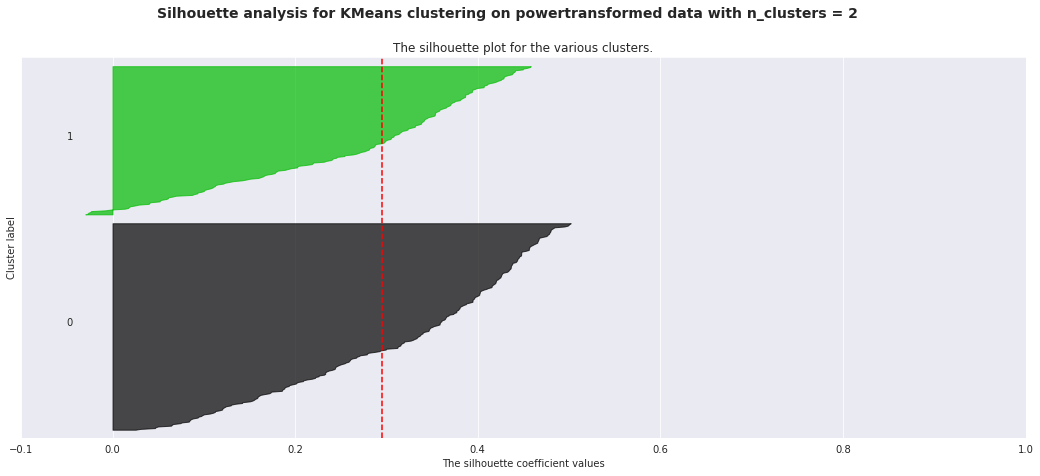

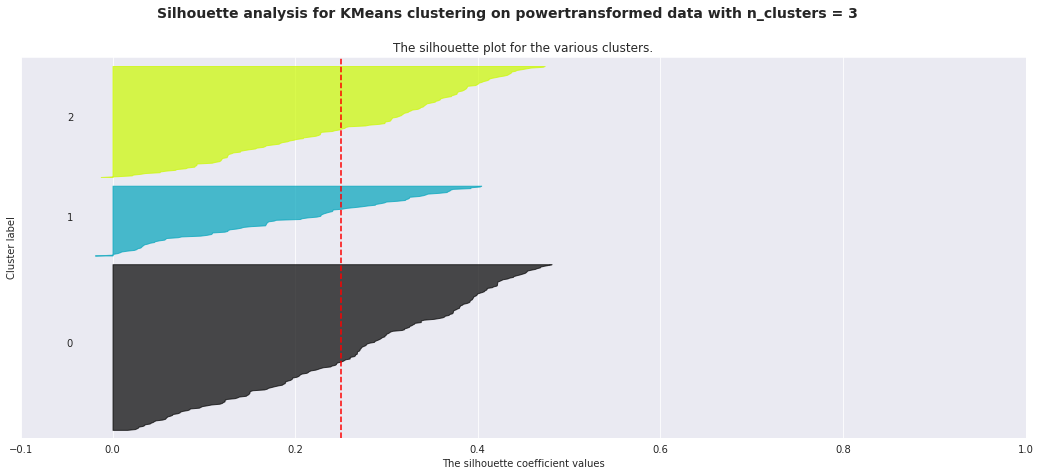

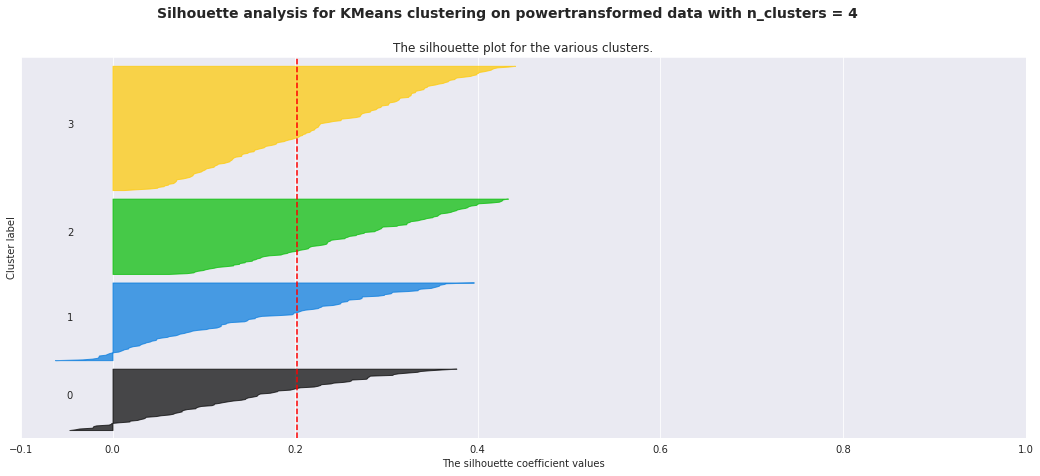

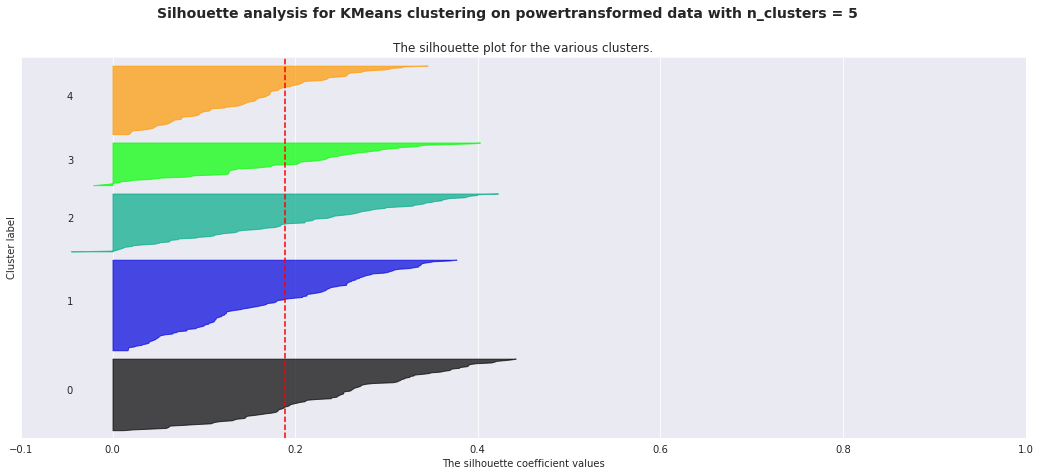

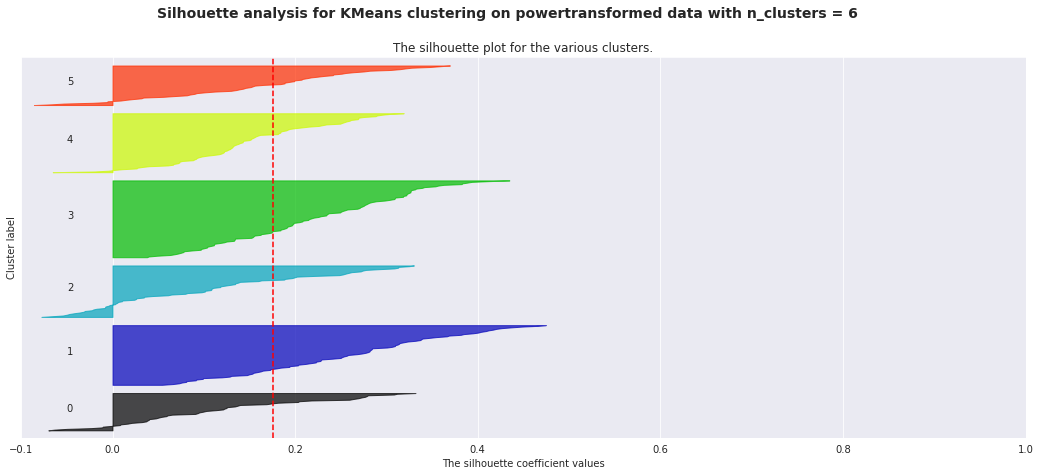

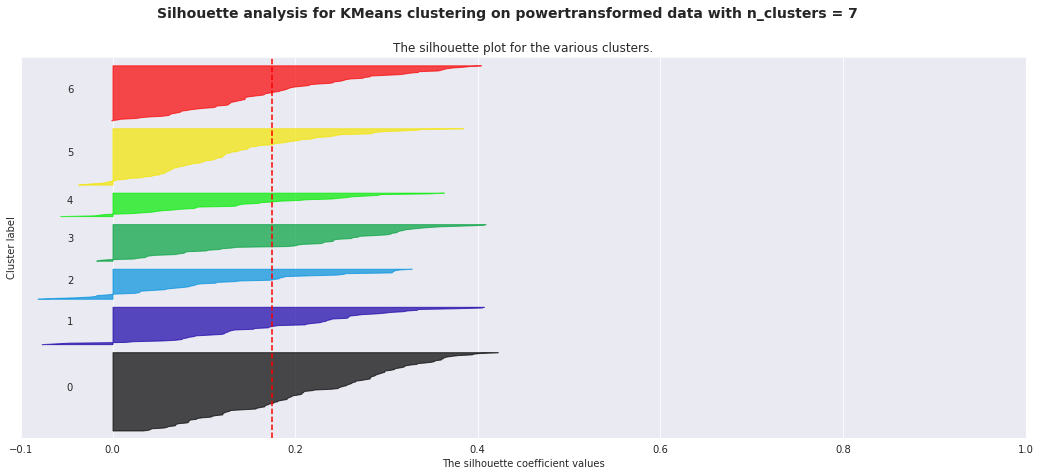

In [23]:
range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1  = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_power) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_power)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_power, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_power, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    
    plt.suptitle(
        "Silhouette analysis for KMeans clustering on powertransformed data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Clustering seems better in power transformed data.
N value 2 and 3 gives least amount of below average silhouette score.
From thickness of clusters, n=3 and power transformation method can be finalized.

In [24]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_power)

Hierarchical Clustering:
1. Dendrogram of power transformed data

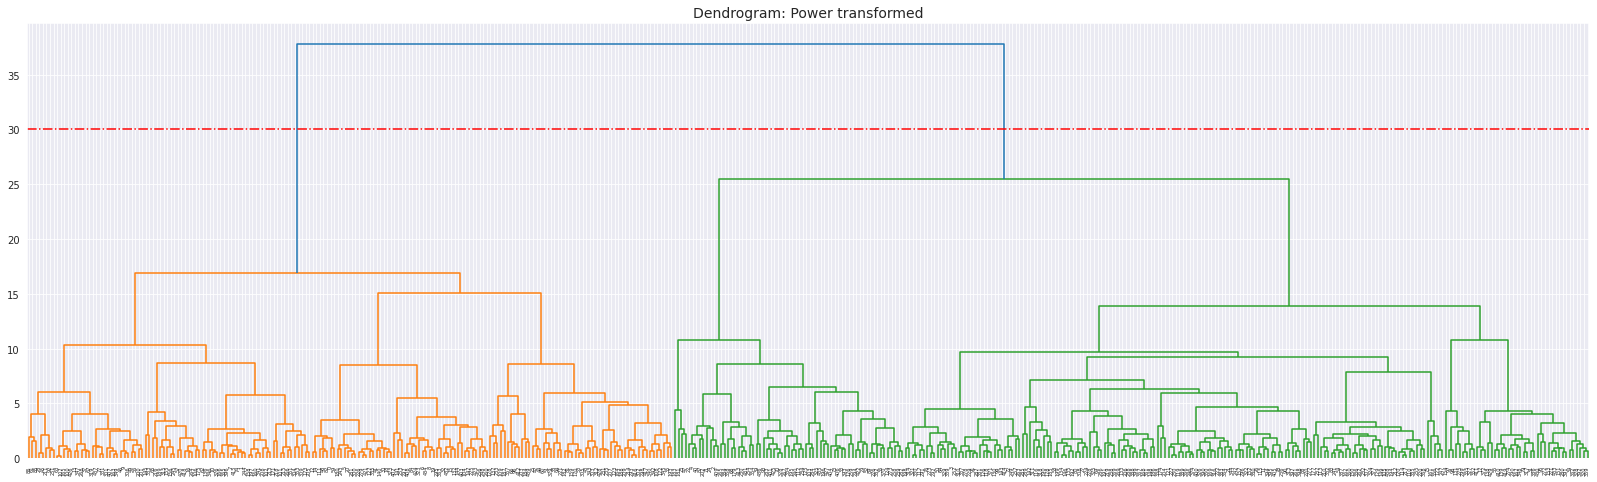

In [25]:
links = linkage(X_power, method='ward')
plt.figure(figsize=(28, 8))
plt.title('Dendrogram: Power transformed', fontsize=14)
plt.axhline(y=30, color='r', linestyle='-.' )
dendrogram(links)
plt.show()

2. Dendrogram of robust scaled data

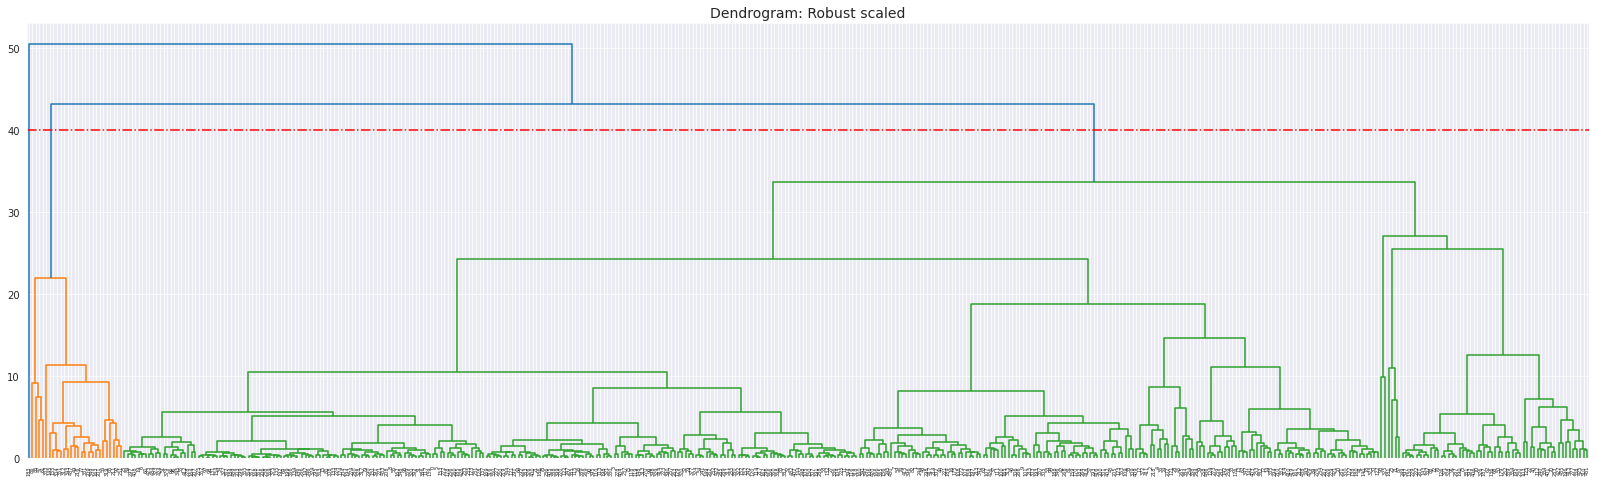

In [26]:
links = linkage(X_robust, method='ward')
plt.figure(figsize=(28, 8))
plt.title('Dendrogram: Robust scaled', fontsize=14)
plt.axhline(y=40, color='r', linestyle='-.' )
dendrogram(links)
plt.show()

Ideal cluster number seems to be 2 in power transformed and 3 in robust scaled case.

Silhouette Score validation:
1. Robust Scaled data

For n_clusters = 2 The average silhouette_score is : 0.9032151582400334
For n_clusters = 3 The average silhouette_score is : 0.5670005061624909
For n_clusters = 4 The average silhouette_score is : 0.40824012277524807
For n_clusters = 5 The average silhouette_score is : 0.38074001073887304
For n_clusters = 6 The average silhouette_score is : 0.3386923395988653
For n_clusters = 7 The average silhouette_score is : 0.26434550905577886


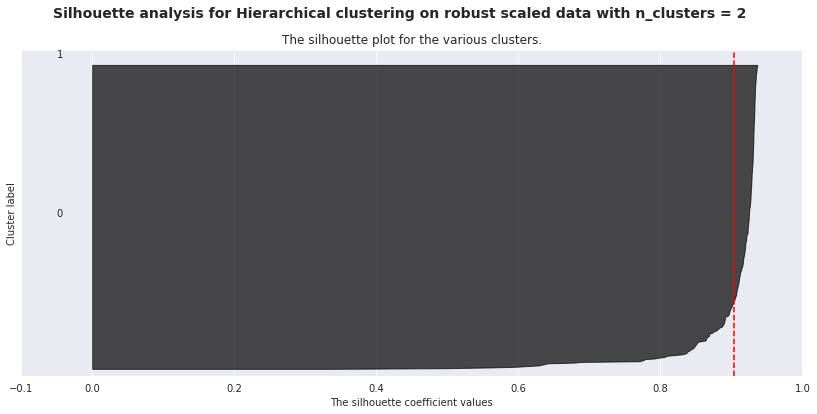

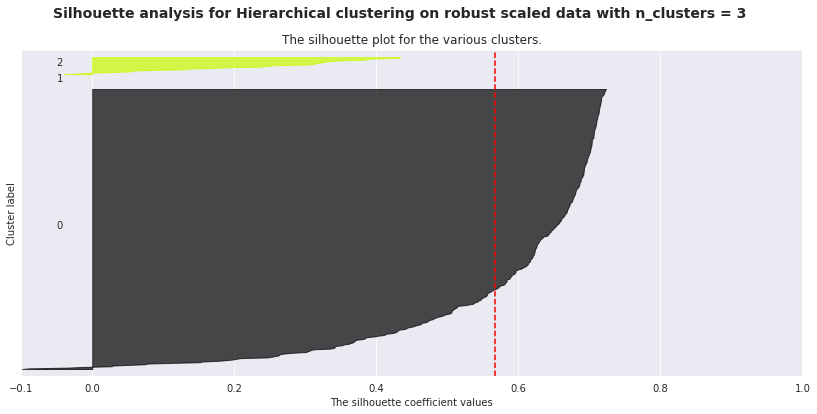

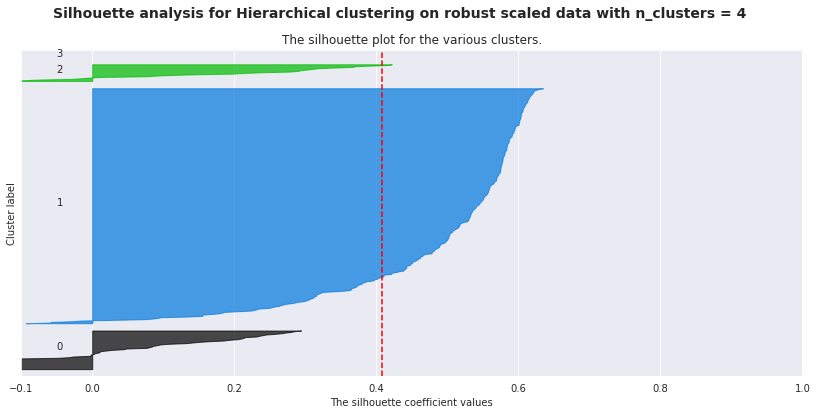

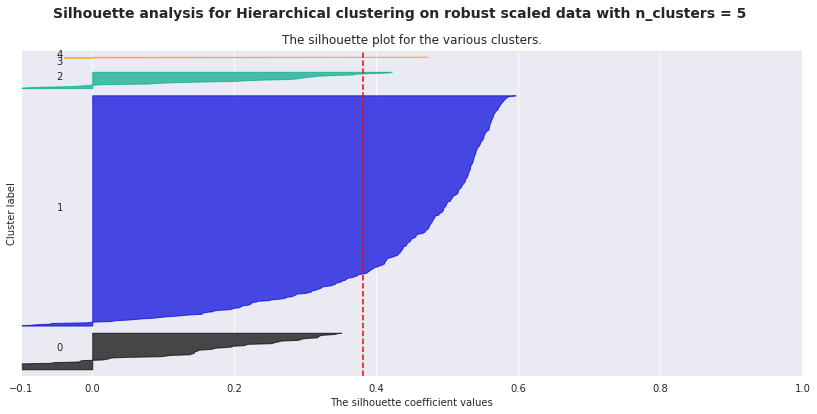

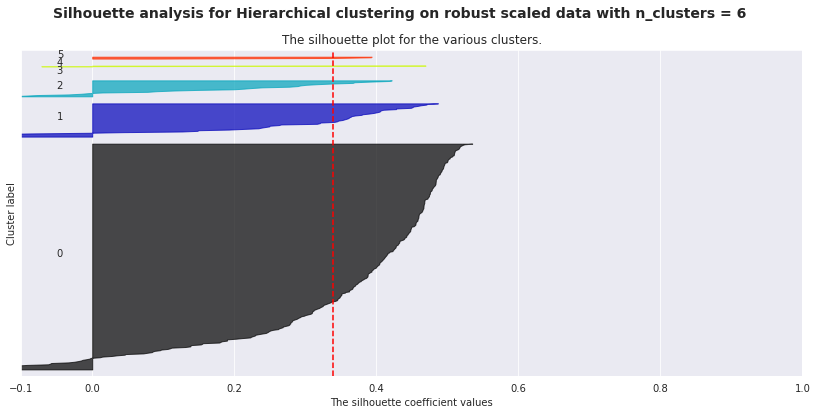

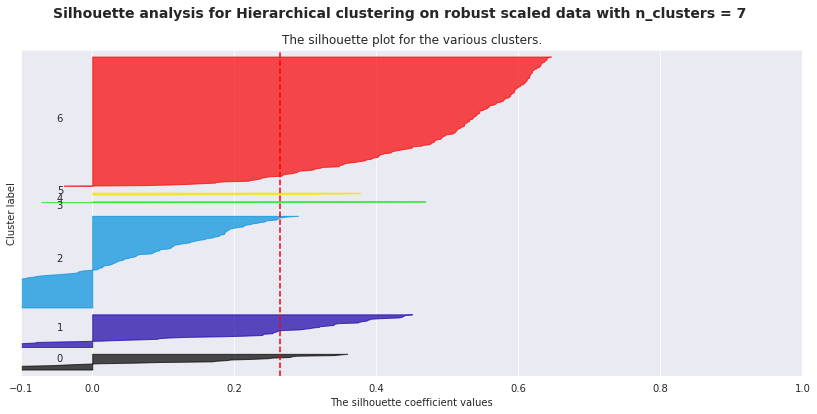

In [27]:
range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1  = plt.subplots(1, 1)
    fig.set_size_inches(14, 6)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_robust) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = clusterer.fit_predict(X_robust)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_robust, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_robust, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    
    plt.suptitle(
        "Silhouette analysis for Hierarchical clustering on robust scaled data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

2. Power Transformed Data

For n_clusters = 2 The average silhouette_score is : 0.25761245073308153
For n_clusters = 3 The average silhouette_score is : 0.23671983160394067
For n_clusters = 4 The average silhouette_score is : 0.18202626922610593
For n_clusters = 5 The average silhouette_score is : 0.16079243761447115
For n_clusters = 6 The average silhouette_score is : 0.15796344330296833
For n_clusters = 7 The average silhouette_score is : 0.1596440668790284


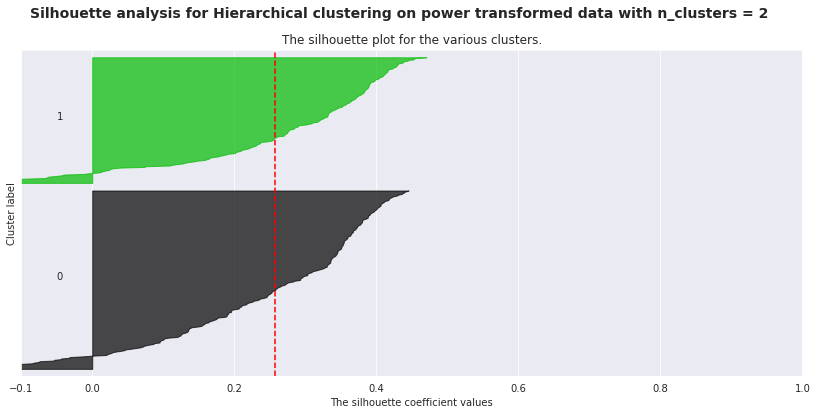

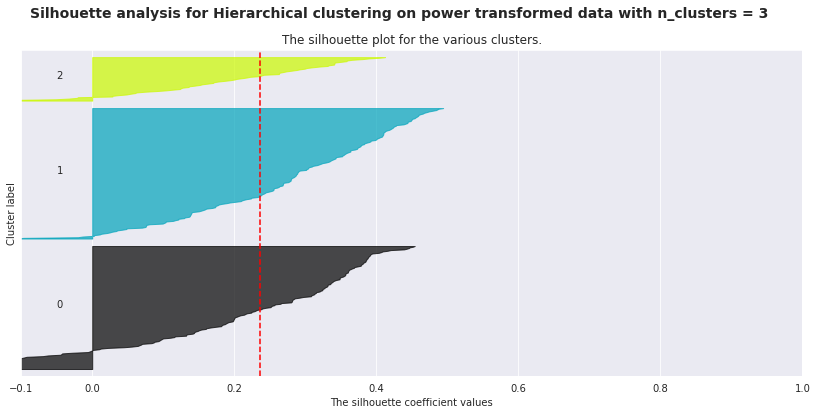

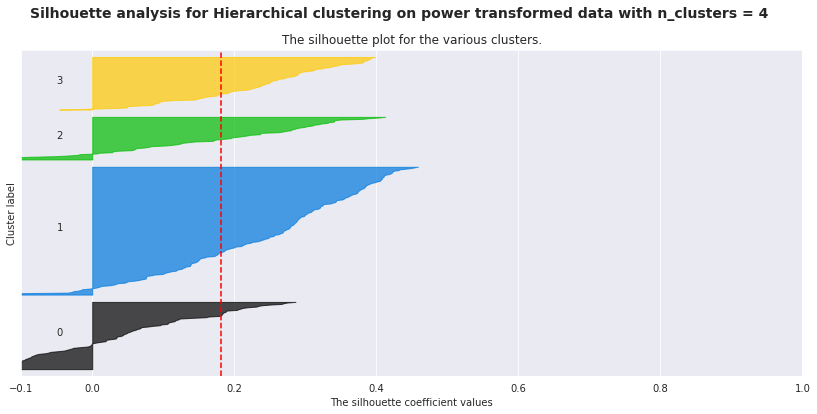

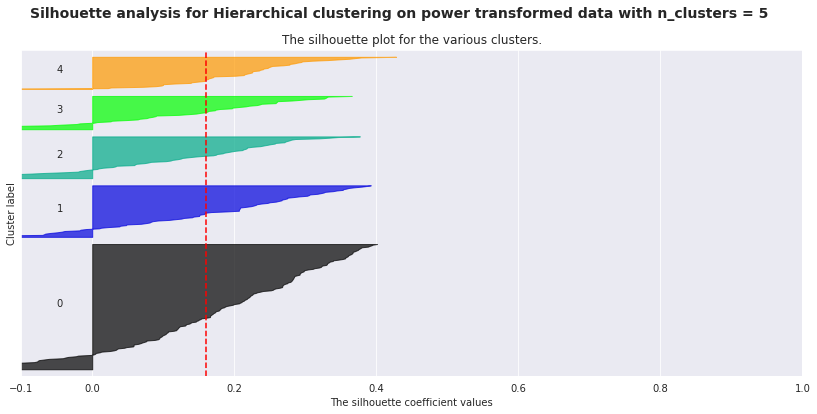

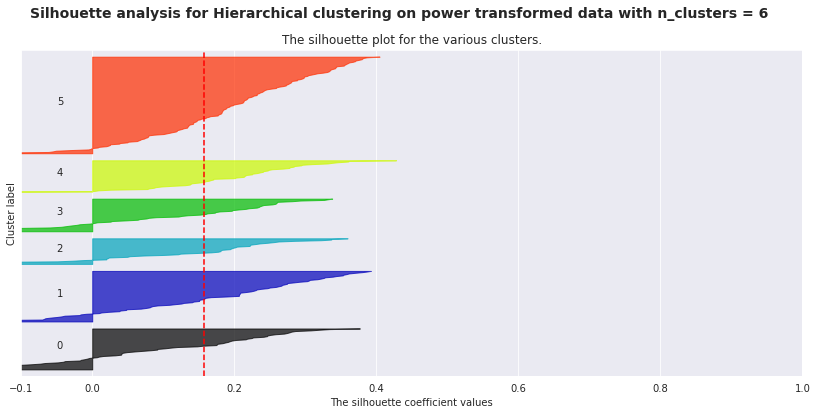

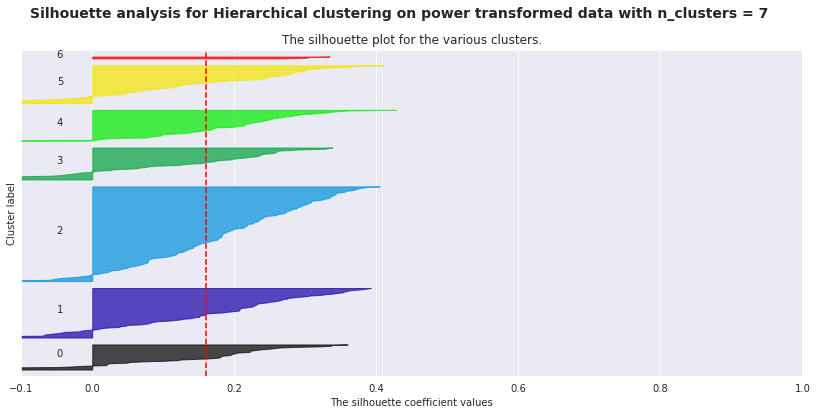

In [28]:
range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1  = plt.subplots(1, 1)
    fig.set_size_inches(14, 6)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_power) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = clusterer.fit_predict(X_power)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_power, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_power, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    
    plt.suptitle(
        "Silhouette analysis for Hierarchical clustering on power transformed data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Once agian n= 2 or 3 seems ideal, although in this case all plots show significant below average silhouette score in every clusters.

In [29]:
ahc = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_ahc = ahc.fit_predict(X_power)
df['kmeans_cluster'] = kmeans_clusters
df['ahc_cluster'] = y_ahc
df.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,kmeans_cluster,ahc_cluster
0,2,3,12669,9656,7561,214,2674,1338,2,1
1,2,3,7057,9810,9568,1762,3293,1776,2,1
2,2,3,6353,8808,7684,2405,3516,7844,0,0
3,1,3,13265,1196,4221,6404,507,1788,0,0
4,2,3,22615,5410,7198,3915,1777,5185,0,0
5,2,3,9413,8259,5126,666,1795,1451,2,1
6,2,3,12126,3199,6975,480,3140,545,2,1
7,2,3,7579,4956,9426,1669,3321,2566,2,1
8,1,3,5963,3648,6192,425,1716,750,2,1
9,2,3,6006,11093,18881,1159,7425,2098,2,1


Power transformation seems the better approach.
Ideal cluster number for Kmeans seems to be 3.
Ideal cluster number for AHC seems to be 2.
With PCA approach
We will attempt PCA on robust scaled data

In [30]:
X_robust.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.301680,1.065712,0.329952,-0.466572,0.506787,0.263810
1,-0.104810,1.092934,0.565993,0.083926,0.675670,0.574008
2,-0.155802,0.915816,0.344418,0.312589,0.736512,4.871459
3,0.344850,-0.429714,-0.062862,1.734708,-0.084442,0.582507
4,1.022092,0.315171,0.287260,0.849573,0.262056,2.988314


In [31]:
pca = PCA(n_components=2)
pca.fit(X_robust)
X_pca = pca.transform(X_robust)
X_pca.shape

(440, 2)

In [32]:
pca.explained_variance_ratio_

array([0.44377284, 0.30248297])

The two PCA components account for about 75% of variance in the data. We select and proceed with 2 components to make visualizing clusters in a scatter plot easier.

K-Means Clustering after applying PCA

In [33]:
wcss_3 = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    wcss_3.append(kmeans.inertia_)

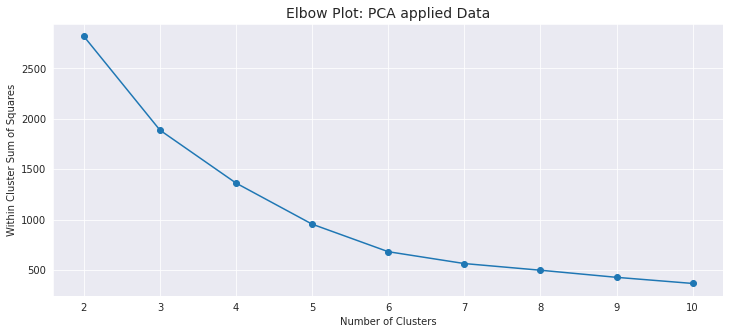

In [34]:
plt.figure(figsize=(12, 5))
plt.title('Elbow Plot: PCA applied Data', fontsize=14)
plt.plot(range(2, 11), wcss_3, marker='o')
plt.ylabel('Within Cluster Sum of Squares')
plt.xlabel('Number of Clusters')
plt.show()

We can choose number of clusters as 6.

In [35]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_pca = kmeans.fit_predict(X_pca)

In [36]:
pca_df = pd.DataFrame(X_pca, columns=['PCA_1', 'PCA_2'])

In [37]:
pca_df['kmeans'] = kmeans_pca

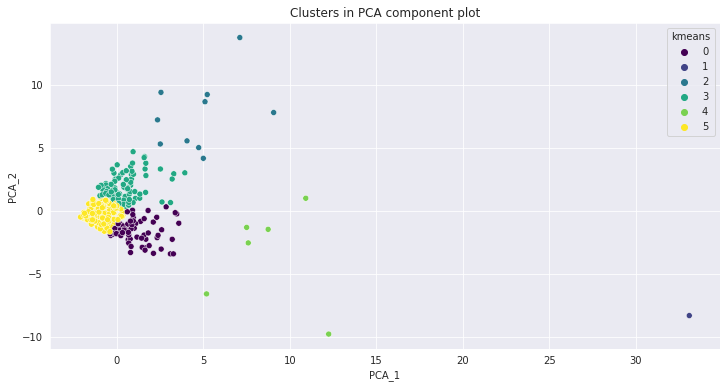

In [38]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
plt.title('Clusters in PCA component plot')
sns.scatterplot(x='PCA_1', y='PCA_2', data=pca_df, hue='kmeans', palette='viridis')
plt.show()

Agglomerative Clustering after applying PCA

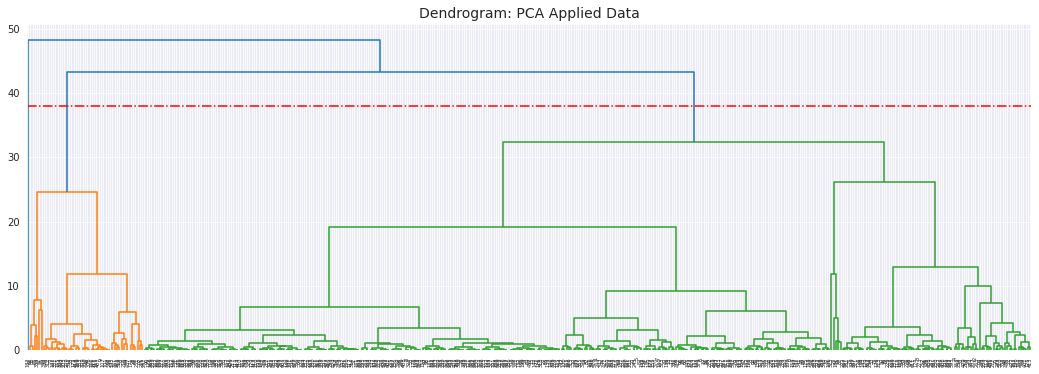

In [39]:
links = linkage(X_pca, method='ward')
plt.figure(figsize=(18, 6))
plt.title('Dendrogram: PCA Applied Data', fontsize=14)
plt.axhline(y=38, color='r', linestyle='-.')
dendrogram(links)
plt.show()

In [40]:
ahc = AgglomerativeClustering(n_clusters=3, linkage='ward')
ahc_pca = ahc.fit_predict(X_pca)
pca_df['ahc'] = ahc_pca
pca_df.head(3)

,PCA_1,PCA_2,kmeans,ahc
0,-0.317907,0.729229,5,0
1,0.201074,0.682827,3,0
2,3.460307,-0.253408,0,0


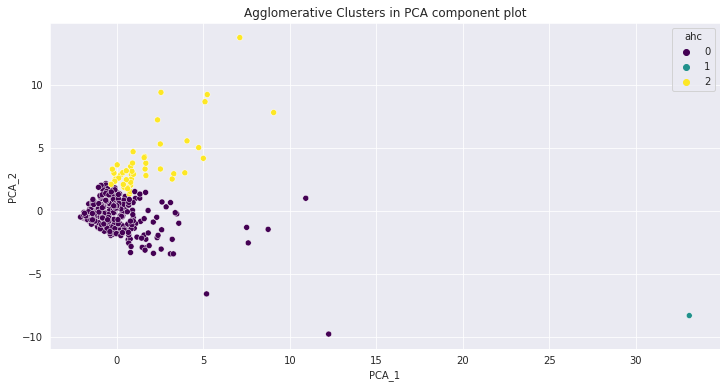

In [41]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
plt.title('Agglomerative Clusters in PCA component plot')
sns.scatterplot(x='PCA_1', y='PCA_2', data=pca_df, hue='ahc', palette='viridis')
plt.show()